In [1]:
import requests
from PIL import Image,ImageDraw,ImageFont
from io import BytesIO

In [2]:
subscription_key='bd63cb7a0dd54fa480b337717e562d05'
face_api_url='https://labuser13face.cognitiveservices.azure.com/face/v1.0/detect'

#Capitalise class, library, package 
#parameters, regional constant>small case
#acroynms>small case
#adding two words together>second word capitalised

image_url='https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/BTS_during_a_White_House_press_conference_May_31%2C_2022_%28cropped%29.jpg/800px-BTS_during_a_White_House_press_conference_May_31%2C_2022_%28cropped%29.jpg'


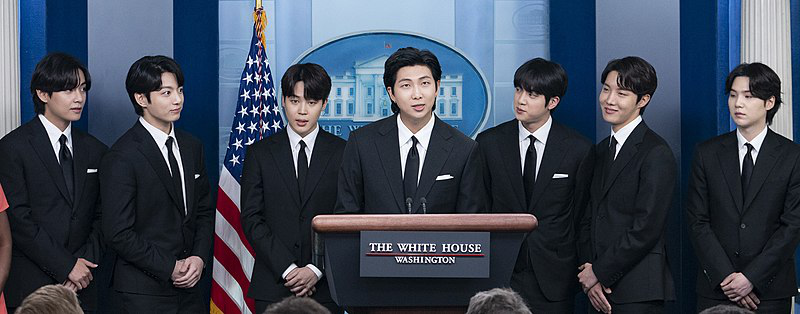

In [3]:
image=Image.open(BytesIO(requests.get(image_url).content))
image

In [4]:
headers={'Ocp-Apim-Subscription-Key': subscription_key}

In [5]:
params={
    'returnFaceID':'false',
    'returnFaceLandmarks':'false',
    'returnFaceAttributes':'smile'

}

In [6]:
data={'url':image_url}

In [7]:
response=requests.post(face_api_url,params=params,headers=headers,json=data )
faces=response.json()
faces

ConnectionError: ignored

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)),outline='red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile),fill='red')

In [ ]:
DrawBox(faces)
image